In [89]:
import pandas as pd 
import matplotlib.pyplot as plt 

from datetime import datetime

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [61]:
df = pd.read_csv('AirPassengers.csv')

df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [63]:
df['Month'] = pd.to_datetime(df['Month'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [64]:
df.set_index('Month', inplace= True)

In [65]:
df = df.rename(columns= {'#Passengers':'Passangers'})

df.head()

,Passangers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

<Figure size 1000x400 with 0 Axes>

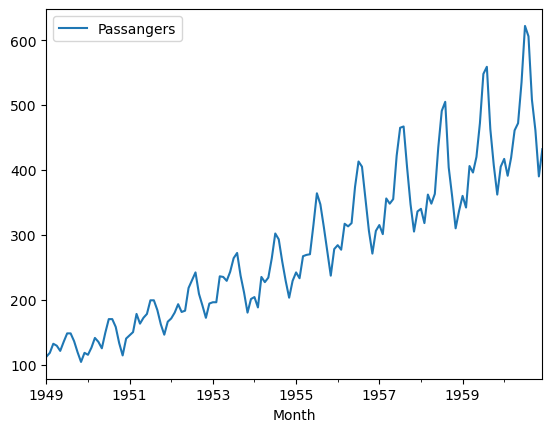

In [66]:
plt.figure(figsize=(10,4))

df.plot()

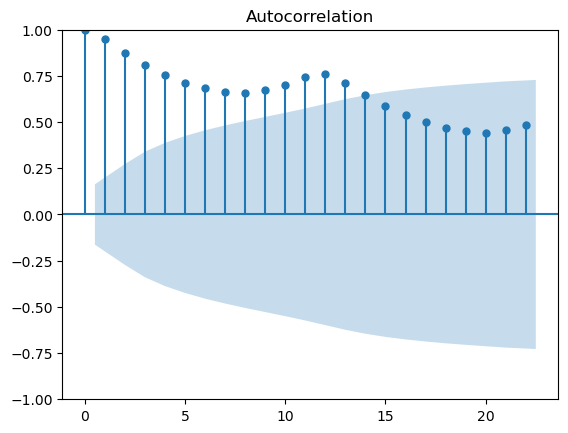

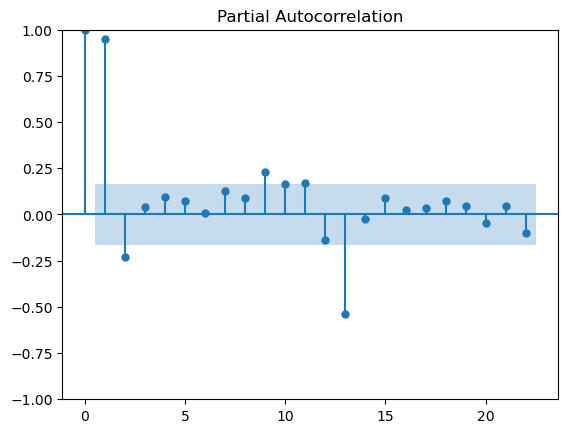

In [67]:
plot_acf = plot_acf(df['Passangers'])
plot_pacf = plot_pacf(df['Passangers'])

In [68]:
df_test = adfuller(df['Passangers'])

print(f'ADF: ', df_test[0])
print(f'P-Value: ', df_test[1])

ADF:  0.8153688792060416
P-Value:  0.9918802434376409


In [76]:
# Time series is not stationary (P value here is > 0.05)
# first order differencing 

first_diff = df.diff().dropna()

result = adfuller(first_diff)
print(f'ADF: ', result[0])
print(f'P-Value: ', result[1])

ADF:  -2.829266824170001
P-Value:  0.054213290283825294


<Axes: xlabel='Month'>

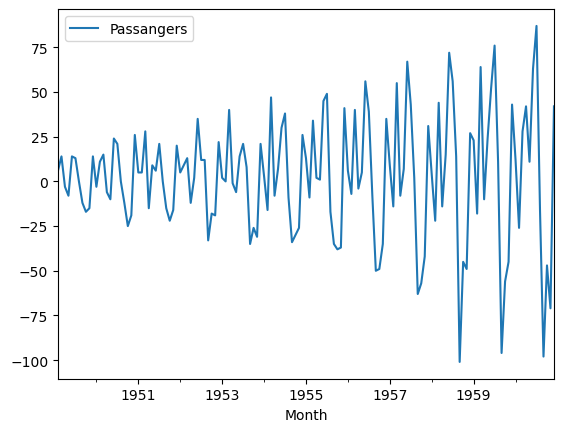

In [73]:
# VIsualizing the result 

df.diff().dropna().plot()

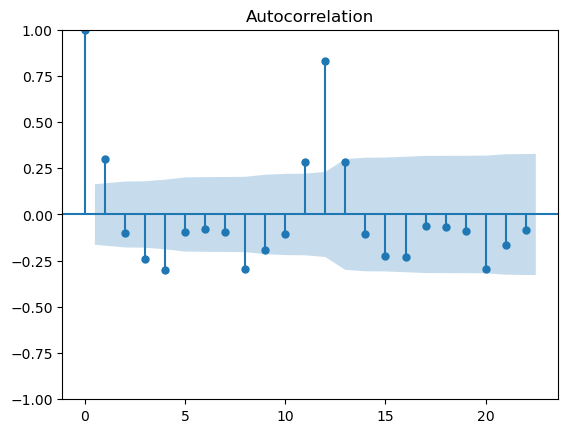

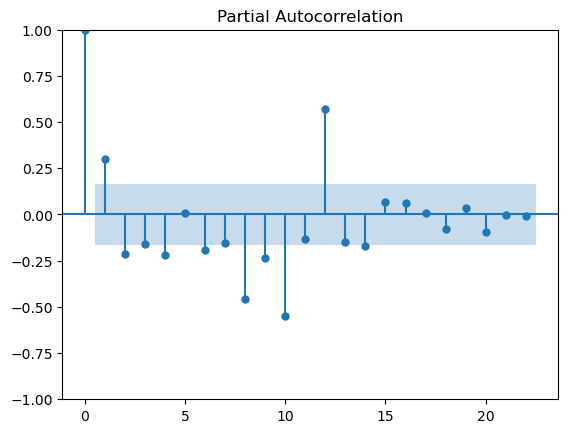

In [88]:
# Value of d = 1, p and q are unknown 

plot_acf = plot_acf(first_diff)
plot_pacf = plot_pacf(first_diff)

# first_diff.info()

In [ ]:
# p = 2 (two values are outside the confidence interval in PACF), d = 1 (found using ADF with P-Value), q = 1 (Found using ACF plot with 1 point being outside the confidence interval)
# These values are for ARIMA. For SARIMA, seasonal order parameters are needed. 
# Building a forecaasting model using ARIMA first

sarimax_model = SARIMAX(df['Passangers'], order = (2,1,1),)

sarimax_fit = sarimax_model.fit()

print(sarimax_fit.summary())

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.78523D+00    |proj g|=  7.71452D-02

At iterate    5    f=  4.76285D+00    |proj g|=  4.19089D-03

At iterate   10    f=  4.75928D+00    |proj g|=  2.90208D-02

At iterate   15    f=  4.75812D+00    |proj g|=  1.09105D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     18      1     0     0   1.091D-05   4.758D+00
  F =   4.7581191652734844     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
        

In [94]:
# Forecasting

forecast_steps = 24

forecast = sarimax_fit.get_forecast(steps= forecast_steps)

forecast_index = pd.date_range(start= df.index[-1], periods= forecast_steps+1, freq='M')[1:]

/var/folders/ch/kb1qmx591n5c2yvx2fc6ffyw0000gn/T/ipykernel_7898/1225607496.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start= df.index[-1], periods= forecast_steps+1, freq='M')[1:]


In [95]:
forecast_index
forecast.predicted_mean

1961-01-01    471.000383
1961-02-01    492.998177
1961-03-01    497.918890
1961-04-01    492.528738
1961-05-01    484.243730
1961-06-01    477.843463
1961-07-01    474.914377
1961-08-01    474.849500
1961-09-01    476.211067
1961-10-01    477.727786
1961-11-01    478.716191
1961-12-01    479.052519
1962-01-01    478.936006
1962-02-01    478.644465
1962-03-01    478.383472
1962-04-01    478.241382
1962-05-01    478.214038
1962-06-01    478.253697
1962-07-01    478.310322
1962-08-01    478.352687
1962-09-01    478.371203
1962-10-01    478.370681
1962-11-01    478.361057
1962-12-01    478.350816
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
# Creating forecast dataframe

forecast_df = pd.DataFrame({
    "Forecast": forecast.predicted_mean.tolist(),
    "lower_CI": forecast.conf_int().iloc[:, 0].tolist(),
    "Upper_CI": forecast.conf_int().iloc[:, 1].tolist()
}, index=forecast_index)

forecast_df.head()

,Forecast,lower_CI,Upper_CI
1961-01-31,471.000383,414.039705,527.961062
1961-02-28,492.998177,401.959622,584.036733
1961-03-31,497.918890,389.707600,606.130180
1961-04-30,492.528738,377.851365,607.206111
1961-05-31,484.243730,367.532409,600.955050


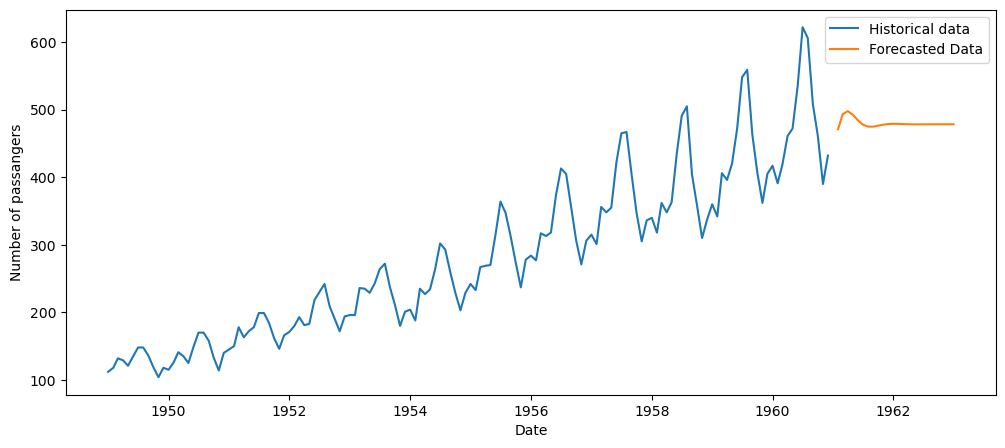

In [103]:
# Plotting forecast values

plt.figure(figsize = (12,5))

plt.plot(df['Passangers'], label= 'Historical data')
plt.plot(forecast_df['Forecast'], label= 'Forecasted Data') 

# plt.fill_between(forecast_df.index, forecast_df['Lower_CI'], forecast_df['Upper_CI'])
plt.xlabel("Date")
plt.ylabel("Number of passangers")
plt.legend()

plt.show()

In [104]:
# Using the same graph used in first difference ACF and PACF:
# P = 1, D = 0, Q = 3

sarimax_model = SARIMAX(df['Passangers'], order= (2,1,1), seasonal_order= (1,0,3, 12))
sarimax_fit = sarimax_model.fit()

print(sarimax_fit.summary())

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.78523D+00    |proj g|=  7.11094D-01

At iterate    5    f=  4.48405D+00    |proj g|=  2.44150D-02

At iterate   10    f=  4.28952D+00    |proj g|=  7.51134D-02

At iterate   15    f=  3.95510D+00    |proj g|=  5.76724D-02

At iterate   20    f=  3.94443D+00    |proj g|=  5.07354D-02

At iterate   25    f=  3.92490D+00    |proj g|=  7.61373D-03

At iterate   30    f=  3.91792D+00    |proj g|=  1.25448D-02

At iterate   35    f=  3.91743D+00    |proj g|=  3.77757D-03

At iterate   40    f=  3.91529D+00    |proj g|=  1.86695D-02

At iterate   45    f=  3.91130D+00    |proj g|=  1.45268D-03

At iterate   50    f=  3.91128D+00    |proj g|=  1.48844D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                 Passangers   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(1, 0, [1, 2, 3], 12)   Log Likelihood                -563.224
Date:                                    Thu, 12 Dec 2024   AIC                           1142.448
Time:                                            12:15:35   BIC                           1166.151
Sample:                                        01-01-1949   HQIC                          1152.080
                                             - 12-01-1960                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6248      0.101      6.169      0

In [105]:
forecast_steps = 24

forecast = sarimax_fit.get_forecast(steps= forecast_steps)

forecast_index = pd.date_range(start= df.index[-1], periods= forecast_steps+1, freq='M')[1:]

/var/folders/ch/kb1qmx591n5c2yvx2fc6ffyw0000gn/T/ipykernel_7898/2928393420.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start= df.index[-1], periods= forecast_steps+1, freq='M')[1:]


In [107]:
forecast_df = pd.DataFrame({
    "Forecast": forecast.predicted_mean.tolist(),
    "lower_CI": forecast.conf_int().iloc[:, 0].tolist(),
    "Upper_CI": forecast.conf_int().iloc[:, 1].tolist()
}, index=forecast_index)

forecast_df.head()

,Forecast,lower_CI,Upper_CI
1961-01-31,446.728145,424.884004,468.572286
1961-02-28,423.353715,397.214683,449.492747
1961-03-31,456.480164,426.862819,486.097509
1961-04-30,491.603423,459.571325,523.635521
1961-05-31,505.177414,471.296237,539.058591


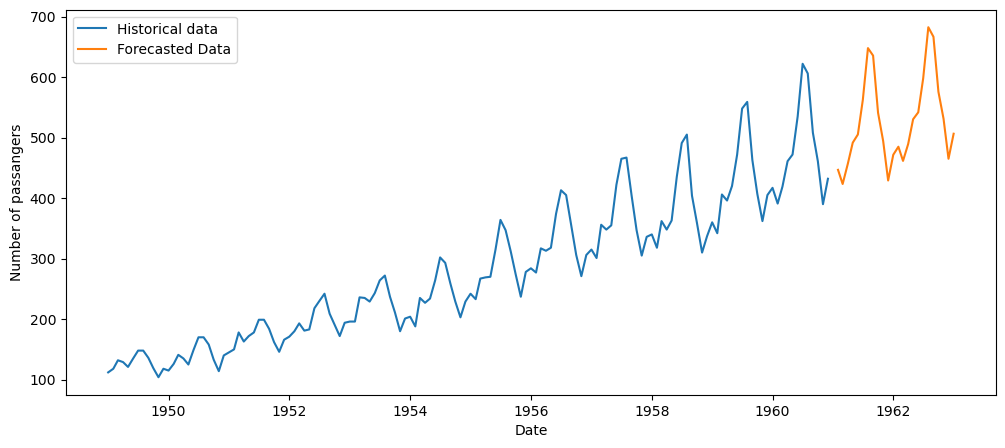

In [108]:
plt.figure(figsize = (12,5))

plt.plot(df['Passangers'], label= 'Historical data')
plt.plot(forecast_df['Forecast'], label= 'Forecasted Data') 

# plt.fill_between(forecast_df.index, forecast_df['Lower_CI'], forecast_df['Upper_CI'])
plt.xlabel("Date")
plt.ylabel("Number of passangers")
plt.legend()

plt.show()